1.	Dataset Overview 

•	Reintroduce your problem and dataset context from P1. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, kurtosis
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:


# --- Load sample data ---
file_path = "./uae_used_cars_10k.csv"
data = pd.read_csv(file_path)

# --- Drop columns not useful for ML ---
data = data.drop(['Transmission', 'Description'], axis=1)

# --- Identify categorical and numeric columns ---
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Automatically decide encoding type ---
# Columns with few unique values -> one-hot encoding
one_hot_cols = [col for col in categorical_cols if data[col].nunique() <= 10]

# Columns with many unique values -> label encoding
label_cols = [col for col in categorical_cols if data[col].nunique() > 10]

# --- One-hot encoding for small cardinality columns ---
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=False)

# --- Label encoding for high cardinality columns ---
le = LabelEncoder()
for col in label_cols:
    data[col + '_encoded'] = le.fit_transform(data[col])
    data.drop(col, axis=1, inplace=True)

# --- Scale numeric columns ---
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# --- Final dataset ---
print(data.head())
print(f"Shape after preprocessing: {data.shape}")

       Year     Price   Mileage  Cylinders_10  Cylinders_12  Cylinders_3  \
0  0.578947  0.002768  0.505169         False         False        False   
1  0.421053  0.003683  0.550147         False         False        False   
2  0.947368  0.001681  0.729601         False         False        False   
3  0.578947  0.007026  0.206035         False         False        False   
4  0.789474  0.009047  0.211707         False         False        False   

   Cylinders_4  Cylinders_5  Cylinders_6  Cylinders_8  Cylinders_Unknown  \
0         True        False        False        False              False   
1         True        False        False        False              False   
2         True        False        False        False              False   
3         True        False        False        False              False   
4         True        False        False        False              False   

   Fuel Type_Diesel  Fuel Type_Electric  Fuel Type_Gasoline  Fuel Type_Hybrid  \
0    

In [3]:
file_path = "./uae_used_cars_10k.csv"
data = pd.read_csv(file_path)
row,col=data.shape
print(f"The number of attribute and records {data.shape}")


print(f"Memory Usage: {data.memory_usage(deep=True).sum()/1024**2 :.2f} MB")

print("\n\nThe format of Data is .csv which sprete it by comma ")

print("The data type ")
# print(data.head(5))
# display(data.info())
display(data.isnull().sum())

The number of attribute and records (10000, 12)
Memory Usage: 6.64 MB


The format of Data is .csv which sprete it by comma 
The data type 


Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64

-- Apply univirante studing all non_numeric data

1-Model

2-Make

3-Boady Type

4-Transmission

5-Color

6-Location

7-Fuel Type

8-Cylinder


We will see the mode and freq Table

In [4]:
ColumeName =["Model","Make","Body Type","Transmission","Color","Location","Fuel Type","Cylinders"]

for i in ColumeName:
 
    print(f"The mode is {data[i].mode()[0]}")
    freq_table =data[i].value_counts()
    print(freq_table)
    print("------")


if data['Cylinders'].isnull().sum() > 0:
    data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].mode()[0])
# YOU MAY DROP COLUMNS THAT data['Cylinders'] IS NULL

display(data.isnull().sum())




The mode is patrol
Model
patrol               386
s-class              288
g-class              257
land-cruiser         208
range-rover-sport    198
                    ... 
centennial             1
aero-8                 1
dtsde-ville            1
trailblazer            1
ct5                    1
Name: count, Length: 488, dtype: int64
------
The mode is mercedes-benz
Make
mercedes-benz    1486
nissan            925
toyota            893
bmw               698
ford              541
                 ... 
gac                 1
haval               1
baic                1
smart               1
morgan              1
Name: count, Length: 65, dtype: int64
------
The mode is SUV
Body Type
SUV                     4607
Sedan                   2790
Coupe                    837
Pick Up Truck            432
Hatchback                334
Sports Car               270
Van                      143
Hard Top Convertible     139
Crossover                136
Soft Top Convertible     120
Other               

Make            0
Model           0
Year            0
Price           0
Mileage         0
Body Type       0
Cylinders       0
Transmission    0
Fuel Type       0
Color           0
Location        0
Description     0
dtype: int64

- Apply univirante for numiric data

apply it for

1-Year
2-price
3-Millage

We will find statical for numiric data such as
1-mean
2-meadian
3-vence 
4-Mad
5-Standard division
6-range
7-Q1
8-Q3
9-IQR
10-higger fernce 
11-lowe fernce 

In [5]:
ColumnName=data.select_dtypes(include=['float64','int64']).columns

for i in ColumnName:
    print(f"{i.upper()}")
    mean = data[i].mean()
    meadian=data[i].median()
    max=data[i].max()
    range=data[i].max()-data[i].min()
    min=data[i].min()
    Q1 = data[i].quantile(0.25)
    Q2 = data[i].quantile(0.50)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1 
    verance = data[i].var()
    standered = data[i].std()
    mad = (data[i] - data[i].mean()).abs().mean()
    FenceQ1=Q1-(1.5*IQR)
    FenceQ3=Q3+(1.5*IQR)
    AboveHighFence3=(data[i]>FenceQ3).sum()
    BelowLowFence1=(data[i]<FenceQ1).sum()

    print(f"For {i} collumn we found")
    
    print(f"Mean is: {mean}")
    print(f"Meadian is: {meadian}")
    print(f"min        {min}")
    print(F"Q1    %25  {Q1}")
    print(F"Q2    %50  {Q2}")
    print(F"Q3    %75  {Q3}")
    print(f"max        {max}")

    print(f"IQR is {IQR}")
    print(f"The range is {range}")
    print(f"Verance is {verance}")
    print(f"Standard dicision is {standered}")
    print(f"Mad is {mad}")

    print("From using Fence Law to see outliers")
    print(f"Data that below Q1 which is {FenceQ1} then we have {BelowLowFence1} outliers ")
    print(f"Data that above Q3 which is {FenceQ3} then we have {AboveHighFence3} outliers ")
    print("-----------------------------------------")



YEAR
For Year collumn we found
Mean is: 2014.4728
Meadian is: 2014.0
min        2005
Q1    %25  2009.0
Q2    %50  2014.0
Q3    %75  2019.0
max        2024
IQR is 10.0
The range is 19
Verance is 33.533813541354135
Standard dicision is 5.790838759744061
Mad is 5.03195312
From using Fence Law to see outliers
Data that below Q1 which is 1994.0 then we have 0 outliers 
Data that above Q3 which is 2034.0 then we have 0 outliers 
-----------------------------------------
PRICE
For Price collumn we found
Mean is: 245234.5079
Meadian is: 102766.0
min        7183
Q1    %25  50352.5
Q2    %50  102766.0
Q3    %75  231248.0
max        14686975
IQR is 180895.5
The range is 14679792
Verance is 221819661179.2985
Standard dicision is 470977.3467793313
Mad is 237643.66565224
From using Fence Law to see outliers
Data that below Q1 which is -220990.75 then we have 0 outliers 
Data that above Q3 which is 502591.25 then we have 1100 outliers 
-----------------------------------------
MILEAGE
For Mileage col

<function matplotlib.pyplot.show(close=None, block=None)>

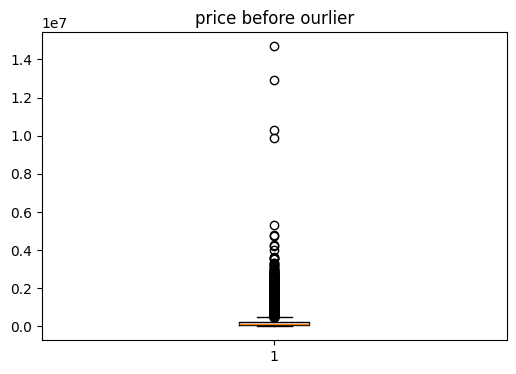

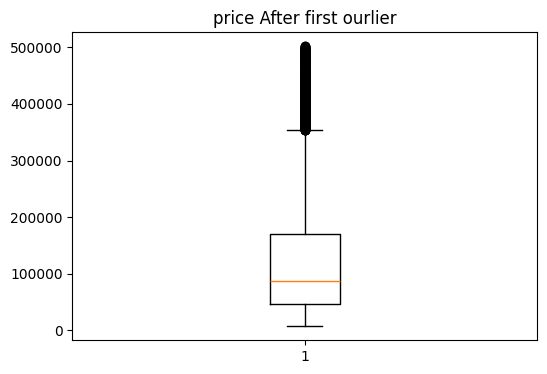

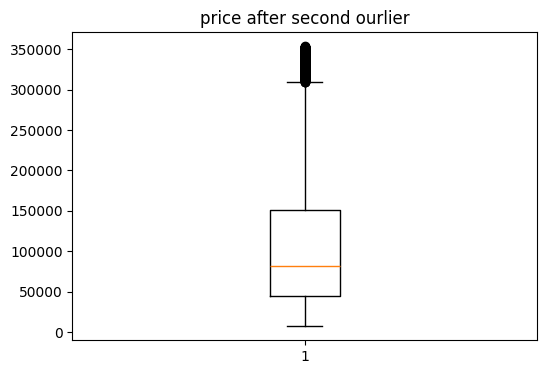

In [6]:


plt.figure(figsize=(6,4))
plt.boxplot(data['Price'])
plt.title('price before ourlier')
plt.show

Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# data['Price'] = data['Price'].clip(lower=lower_limit, upper=upper_limit)
data = data[(data['Price'] >= lower_limit) & (data['Price'] <= upper_limit)]

plt.figure(figsize=(6,4))
plt.boxplot(data['Price'])
plt.title('price After first ourlier')
plt.show


Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# data['Price'] = data['Price'].clip(lower=lower_limit, upper=upper_limit)
data = data[(data['Price'] >= lower_limit) & (data['Price'] <= upper_limit)]

plt.figure(figsize=(6,4))
plt.boxplot(data['Price'])
plt.title('price after second ourlier')
plt.show


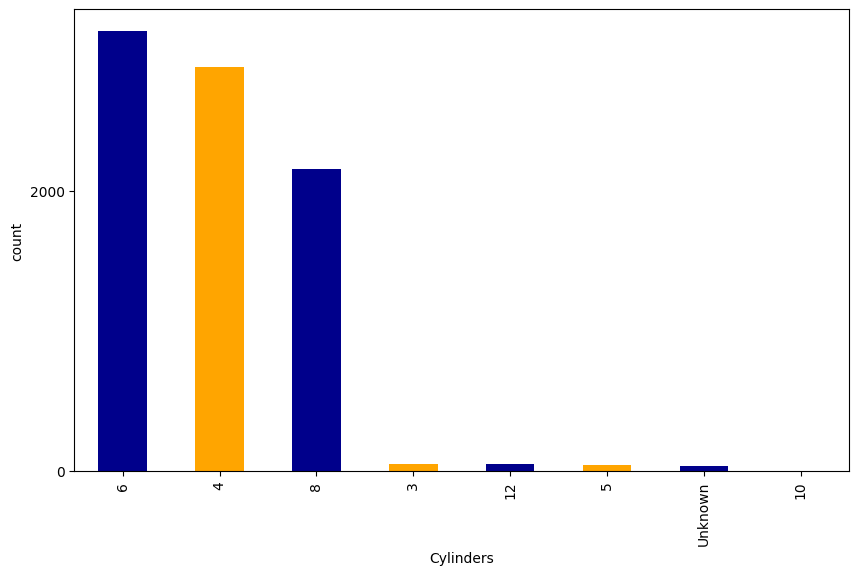

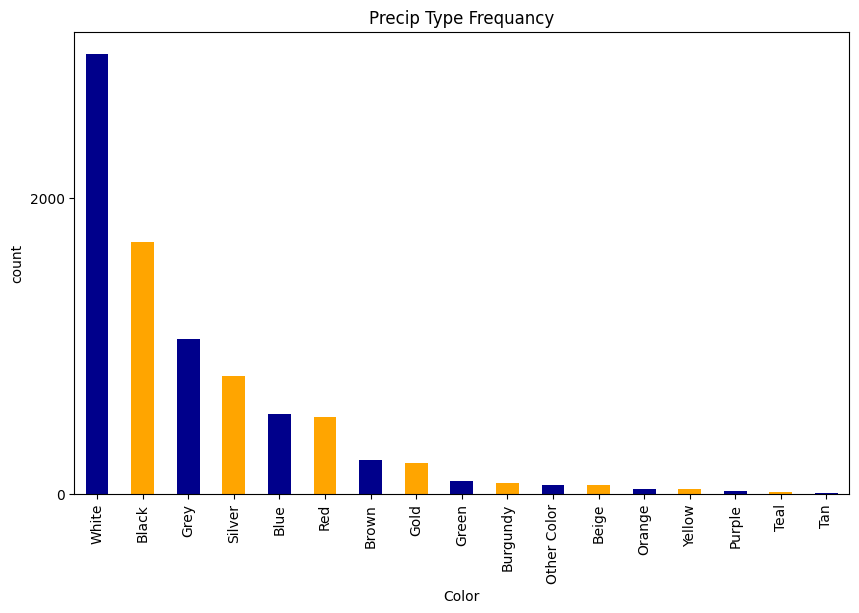

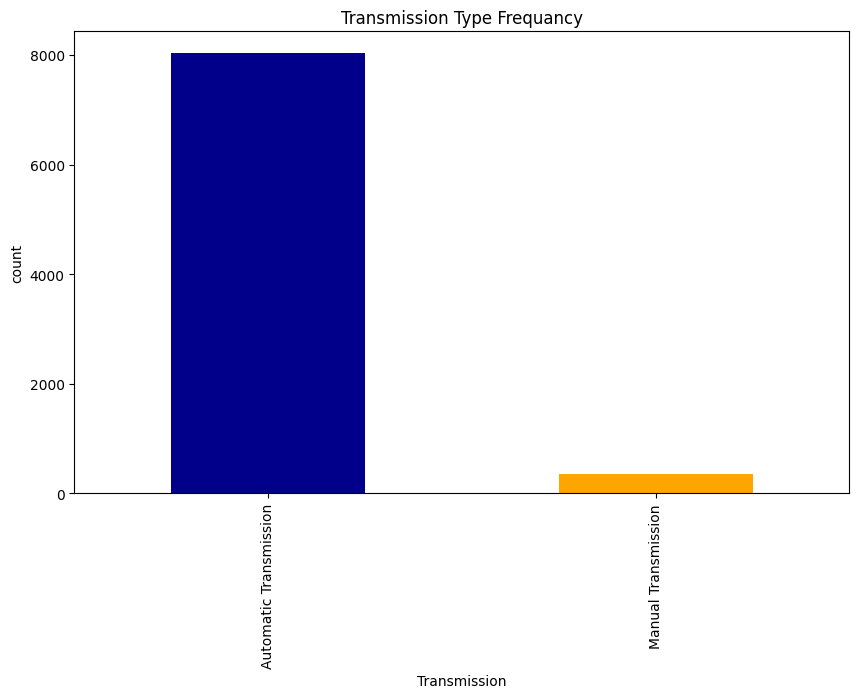

In [7]:
ColumnName=['Cylinders','Color','Transmission'] 
title=['','Precip Type Frequancy','Transmission Type Frequancy']
t=0
for i in ColumnName:
    count =data[i].value_counts()
    plt.figure(figsize=(10,6))
    count.plot(kind='bar',color=['darkblue','orange'])
    plt.title(title[t])
    plt.yticks(np.arange(0, count.max()+5,2000))
    t+=1
    plt.xlabel(i)
    plt.ylabel('count')
    
plt.show()

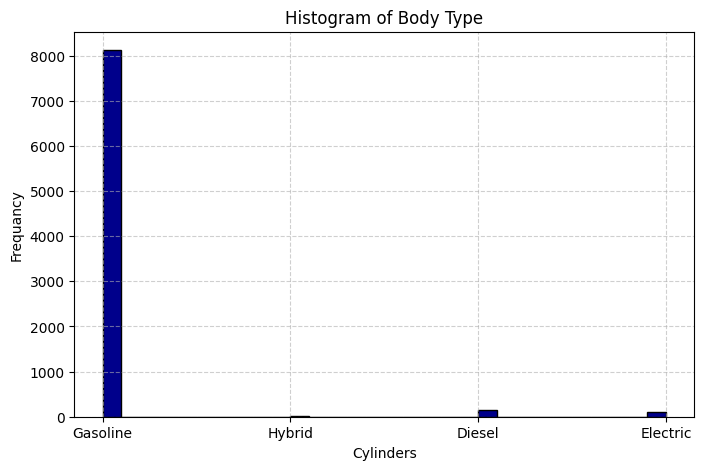

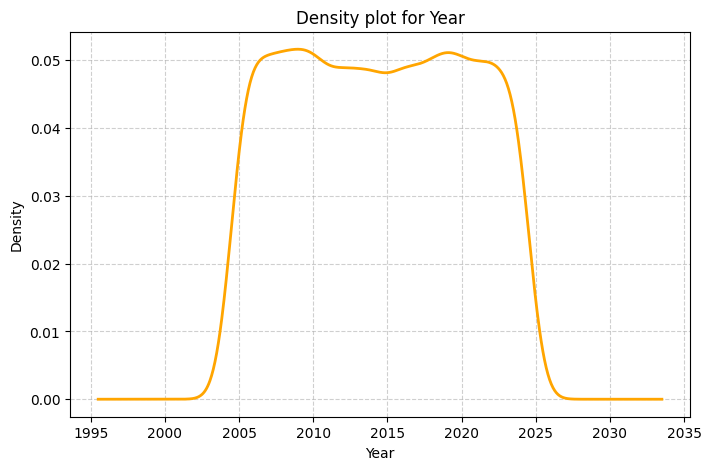

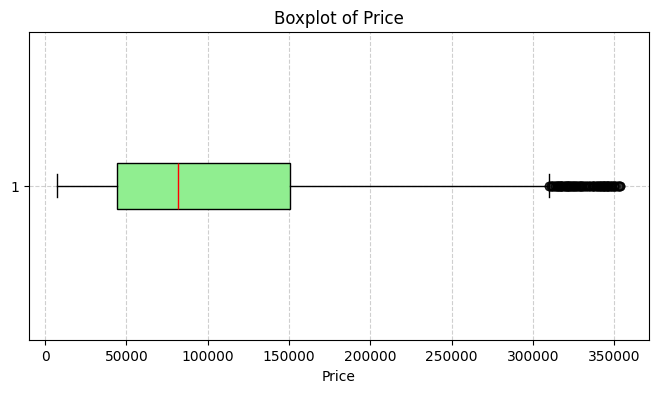

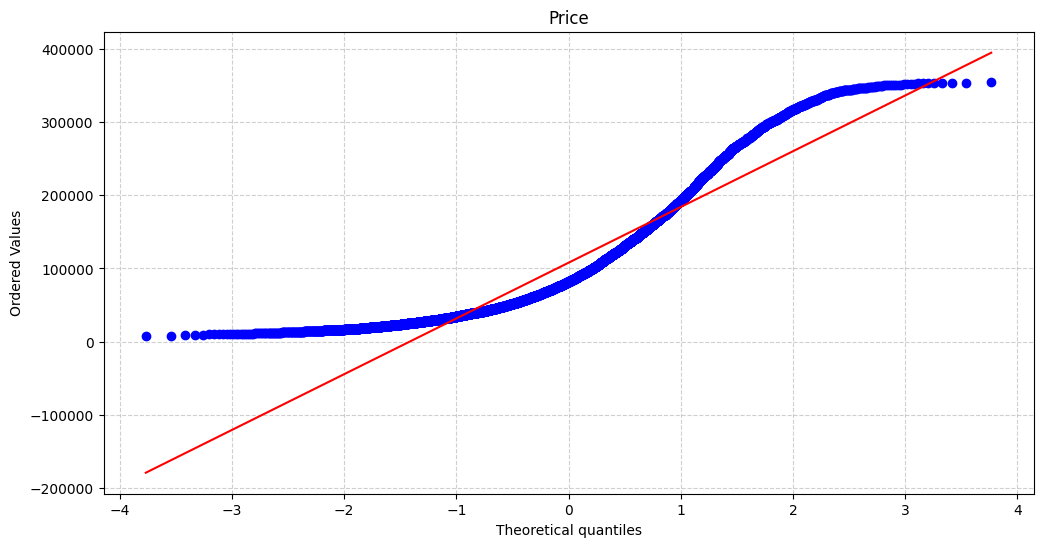

In [8]:


count = data['Fuel Type'].value_counts()

plt.figure(figsize=(8,5))
plt.hist(data['Fuel Type'], bins=30, color='darkblue', edgecolor='black')
plt.title('Histogram of Body Type')
plt.xlabel('Cylinders')
plt.ylabel('Frequancy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# FIXED: use numeric column instead of 'Model'
plt.figure(figsize=(8,5))
data['Year'].plot(kind='density', color='orange', linewidth=2)

plt.title('Density plot for Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(8,4))
plt.boxplot(
    data['Price'],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightgreen', color='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='blue', alpha=0.5)
)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

temp = data['Price'].dropna() 
plt.figure(figsize=(12,6))
stats.probplot(temp, dist="norm", plot=plt)
plt.title('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


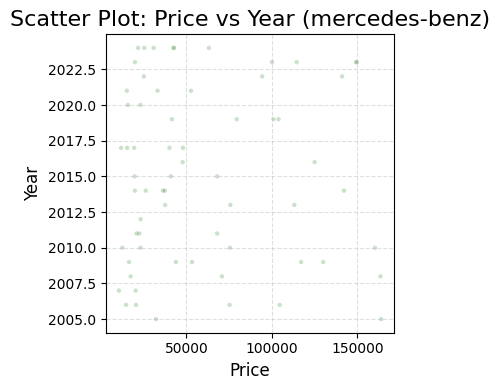

int64
int64
Covariance:
               Price         Year
Price  2.115260e+09 -1577.692548
Year  -1.577693e+03    36.717788

Correlation:
           Price      Year
Price  1.000000 -0.005661
Year  -0.005661  1.000000

Single values -> Cov: -1577.6925, Corr: -0.0057


In [9]:

import matplotlib.pyplot as plt

# --- Define columns ---
FirstColumn = 'Price'
# SecoundColumn = 'Mileage'
SecoundColumn = 'Year'


# --- Filter for Toyota Camry only ---
brand_col = 'Make'
model_col = 'Model'
engineType = 'Cylinders'
Gear = 'Transmission'



filtered_data = data[
    (data[brand_col].str.lower() == 'toyota') 
    & (data[model_col].str.lower() == 'camry')
]



# --- Scatter plot ---
plt.figure(figsize=(4,4))
plt.scatter(
    filtered_data[FirstColumn],
    filtered_data[SecoundColumn],
    color='darkgreen', alpha=0.2, s=10, marker='o', edgecolors='none'
)

plt.title(f'Scatter Plot: {FirstColumn} vs {SecoundColumn} (mercedes-benz)', fontsize=16)
plt.xlabel(FirstColumn, fontsize=12)
plt.ylabel(SecoundColumn, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# --- Covariance & Correlation on filtered data ---
Convariance = filtered_data[[FirstColumn, SecoundColumn]].cov()
Correlation = filtered_data[[FirstColumn, SecoundColumn]].corr()
cov = filtered_data[FirstColumn].cov(filtered_data[SecoundColumn])
cor = filtered_data[FirstColumn].corr(filtered_data[SecoundColumn])

print(filtered_data[FirstColumn].dtype)
print(filtered_data[SecoundColumn].dtype)


4

print('Covariance:\n', Convariance)
print('\nCorrelation:\n', Correlation)
print(f'\nSingle values -> Cov: {cov:.4f}, Corr: {cor:.4f}')


__ Now we will see Relationship between Type Boday with Transmision

In [10]:


table =pd.crosstab(data['Body Type'],data['Transmission'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square Statistic:", round(chi2, 2))
print('-------------')
print('contingency table\n',table)

NameError: name 'chi2_contingency' is not defined

<Figure size 800x500 with 0 Axes>

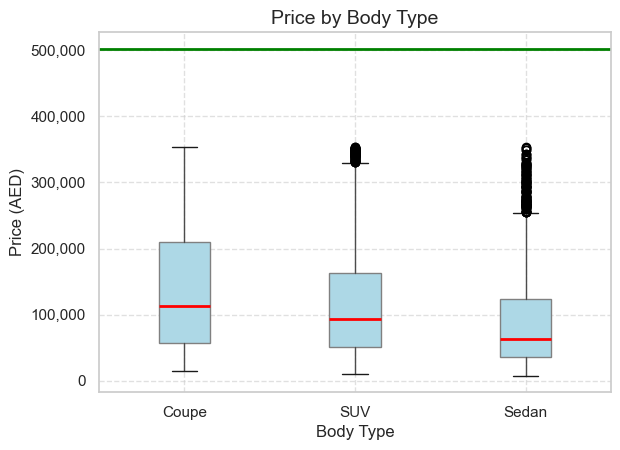

The body Type that the price above 502,591 which is green line is an outliers 


In [ ]:


selected_bodies = ['SUV', 'Sedan', 'Coupe', 'Pickup'] 
filtered_data = data[data['Body Type'].isin(selected_bodies)]

plt.figure(figsize=(8, 5))
filtered_data.boxplot(
    column='Price',
    by='Body Type',
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='gray'),
    medianprops=dict(color='red', linewidth=2),
)

plt.title('Price by Body Type', fontsize=14)
plt.suptitle('')
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Price (AED)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
# 👇 Format y-axis with commas
plt.axhline(y=502_591, color='green', linestyle='-', linewidth=2, label='Outlier Threshold (502,591 AED)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

print("The body Type that the price above 502,591 which is green line is an outliers ")


In [ ]:

filtered_data = data[(data['Make'] == 'mercedes-benz') & (data['Model'] == 'g-class')]

corr_matrix = filtered_data[['Price', 'Mileage', 'Year']].corr()

print("Correlation Matrix (Nissan Patrol only):")
print(round(corr_matrix, 2))



Correlation Matrix (Nissan Patrol only):
         Price  Mileage  Year
Price     1.00     0.20  0.01
Mileage   0.20     1.00 -0.07
Year      0.01    -0.07  1.00


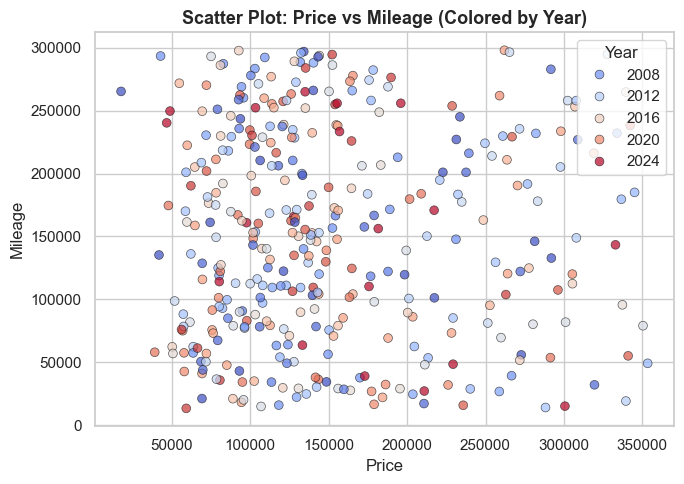

In [ ]:
sns.set_theme(style="whitegrid")

filtered_data = data[(data['Make'] == 'nissan') & (data['Model'] == 'patrol')]

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=filtered_data,
    x='Price',
    y='Mileage',
    hue='Year',  
    palette='coolwarm',
    alpha=0.7,
    edgecolor='k',
    s=40
)

plt.title("Scatter Plot: Price vs Mileage (Colored by Year)", fontsize=13, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()

plt.show()

In [ ]:
row,col=data.shape
print(f"The number of attribute {col}")
print(f"The number of record {row}")


print("\n\nThe format of Data is .csv which sprete it by comma ")

print("The data type ")
data.head(5)


The number of attribute 12
The number of record 8385


The format of Data is .csv which sprete it by comma 
The data type 


,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


In [ ]:


# --- Drop columns not useful for ML ---
data = data.drop(['Transmission', 'Description'], axis=1)

# --- Identify categorical and numeric columns ---
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Automatically decide encoding type ---
# Columns with few unique values -> one-hot encoding
one_hot_cols = [col for col in categorical_cols if data[col].nunique() <= 10]

# Columns with many unique values -> label encoding
label_cols = [col for col in categorical_cols if data[col].nunique() > 10]

# --- One-hot encoding for small cardinality columns ---
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=False)

# --- Label encoding for high cardinality columns ---
le = LabelEncoder()
for col in label_cols:
    data[col + '_encoded'] = le.fit_transform(data[col])
    data.drop(col, axis=1, inplace=True)

# --- Scale numeric columns ---
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# --- Final dataset ---
print(data.head())
print(f"Shape after preprocessing: {data.shape}")

       Year     Price   Mileage  Cylinders_10  Cylinders_12  Cylinders_3  \
0  0.578947  0.117260  0.505225         False         False        False   
1  0.421053  0.156017  0.550210         False         False        False   
2  0.947368  0.071212  0.729693         False         False        False   
3  0.578947  0.297621  0.206043         False         False        False   
4  0.789474  0.383243  0.211717         False         False        False   

   Cylinders_4  Cylinders_5  Cylinders_6  Cylinders_8  Cylinders_Unknown  \
0         True        False        False        False              False   
1         True        False        False        False              False   
2         True        False        False        False              False   
3         True        False        False        False              False   
4         True        False        False        False              False   

   Fuel Type_Diesel  Fuel Type_Electric  Fuel Type_Gasoline  Fuel Type_Hybrid  \
0    